#### This is a neural network built to predict the Mohs Hardness of minerals/materials based on intrinsic compositional features like crystal structure, valence electrons, Pauling's electronegativity, ionization energy, etc. The dataset is from [kaggle](https://www.kaggle.com/datasets/jocelyndumlao/prediction-of-mohs-hardness-with-machine-learning?resource=download)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Artificial_Crystals_Dataset.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             52 non-null     int64  
 1   Formula                52 non-null     object 
 2   Crystal structure      51 non-null     object 
 3   Hardness (Mohs)        52 non-null     float64
 4   allelectrons_Total     52 non-null     float64
 5   density_Total          52 non-null     float64
 6   allelectrons_Average   52 non-null     float64
 7   val_e_Average          52 non-null     float64
 8   atomicweight_Average   52 non-null     float64
 9   ionenergy_Average      52 non-null     float64
 10  el_neg_chi_Average     52 non-null     float64
 11  R_vdw_element_Average  52 non-null     float64
 12  R_cov_element_Average  52 non-null     float64
 13  zaratio_Average        52 non-null     float64
 14  density_Average        52 non-null     float64
dtypes: float

In [4]:
dataset.head()

,Unnamed: 0,Formula,Crystal structure,Hardness (Mohs),allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,0,MnTeMoO6,tetragonal,4.5,167.0,23.907992,18.555556,5.000000,41.609136,11.693844,2.938889,1.711111,0.884444,0.477830,2.656444
1,1,MgH2,tetragonal,4.0,14.0,1.740168,4.666667,1.333333,8.773227,11.614333,1.903333,1.310000,0.680000,0.825990,0.580056
2,2,CO(NH2)2C4H6O5,monoclinic,2.5,102.0,8.511159,4.434783,3.304348,8.440584,13.176622,2.672609,1.379130,0.530870,0.713850,0.370050
3,3,GaPO4,trigonal,5.5,78.0,8.109328,13.000000,5.333333,27.448814,11.826400,2.960000,1.625000,0.813333,0.488163,1.351555
4,4,Ga3PO7,trigonal,6.5,164.0,19.921324,14.909091,5.090909,32.012361,11.255573,2.881818,1.640909,0.841818,0.483480,1.811029


In [5]:
#First two columns irrelevant to the training of our model. Let's keep them out

dataset = dataset.drop(["Unnamed: 0", "Formula"], axis = 1)

<AxesSubplot:>

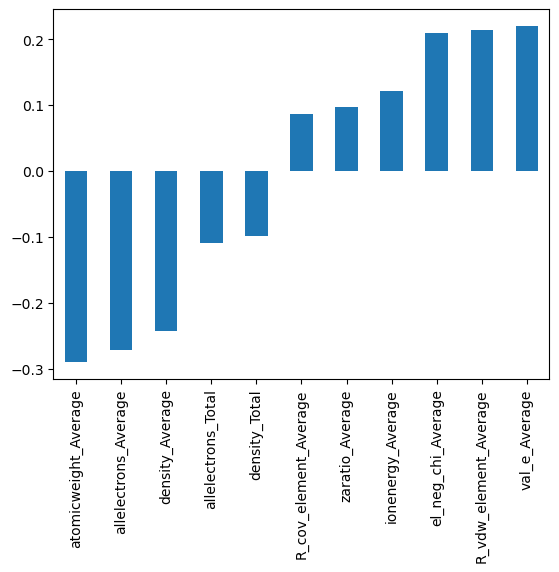

In [6]:
#Someone with a background in materials science/engineering would be interested in which intrinsic/compositional material property deductively has more impact on the hardness of the material

dataset.corr()["Hardness (Mohs)"].sort_values()[:-1].plot(kind = "bar")

#### It is interesting to see that properties like ionization energy, electronegativity, vanderwaal's forces and valence electrons come together to contribute greatly to the hardness of materials. This, without doubt, corroborates theoretical knowledge about hardness and overall resistance to plastic deformation of materials

In [7]:
dataset.head()

,Crystal structure,Hardness (Mohs),allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,tetragonal,4.5,167.0,23.907992,18.555556,5.000000,41.609136,11.693844,2.938889,1.711111,0.884444,0.477830,2.656444
1,tetragonal,4.0,14.0,1.740168,4.666667,1.333333,8.773227,11.614333,1.903333,1.310000,0.680000,0.825990,0.580056
2,monoclinic,2.5,102.0,8.511159,4.434783,3.304348,8.440584,13.176622,2.672609,1.379130,0.530870,0.713850,0.370050
3,trigonal,5.5,78.0,8.109328,13.000000,5.333333,27.448814,11.826400,2.960000,1.625000,0.813333,0.488163,1.351555
4,trigonal,6.5,164.0,19.921324,14.909091,5.090909,32.012361,11.255573,2.881818,1.640909,0.841818,0.483480,1.811029


In [8]:
#Could be possible to encode the "crystal structure" categorical column

dataset["Crystal structure"].nunique()

7

In [9]:
crystal_encoding = pd.get_dummies(dataset["Crystal structure"], drop_first = True)
dataset = dataset.drop("Crystal structure", axis = 1)
dataset = pd.concat([dataset, crystal_encoding], axis =1)

In [10]:
dataset.head()

,Hardness (Mohs),allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,hexagonal,monoclinic,orthorhombic,rhomohedral,tetragonal,trigonal
0,4.5,167.0,23.907992,18.555556,5.000000,41.609136,11.693844,2.938889,1.711111,0.884444,0.477830,2.656444,0,0,0,0,1,0
1,4.0,14.0,1.740168,4.666667,1.333333,8.773227,11.614333,1.903333,1.310000,0.680000,0.825990,0.580056,0,0,0,0,1,0
2,2.5,102.0,8.511159,4.434783,3.304348,8.440584,13.176622,2.672609,1.379130,0.530870,0.713850,0.370050,0,1,0,0,0,0
3,5.5,78.0,8.109328,13.000000,5.333333,27.448814,11.826400,2.960000,1.625000,0.813333,0.488163,1.351555,0,0,0,0,0,1
4,6.5,164.0,19.921324,14.909091,5.090909,32.012361,11.255573,2.881818,1.640909,0.841818,0.483480,1.811029,0,0,0,0,0,1


In [11]:
X = dataset.drop("Hardness (Mohs)", axis = 1).values

y = dataset["Hardness (Mohs)"].values

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model =  Sequential()

In [15]:
X_train.shape

(39, 17)

In [16]:
model.add(Dense(17, activation = "relu"))

model.add(Dense(17//2, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mean_squared_error")

In [17]:
model.fit(x = X_train, y = y_train, epochs = 200, validation_data = (X_test, y_test), batch_size = 32, verbose = 1)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 31.0483 - val_loss: 29.0224
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 30.8988 - val_loss: 28.6655
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 30.5122 - val_loss: 28.3165
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 30.6698 - val_loss: 27.9609
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 28.9855 - val_loss: 27.6048
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 29.2071 - val_loss: 27.2400
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 29.5163 - val_loss: 26.8745
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 28.2819 - val_loss: 26.5054
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 28.4689 - val_loss: 26.1319
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 27.6427 - val_loss: 25.7539
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 27.9319 - val_loss: 25.3483
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step -

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.8340 - val_loss: 2.7216
Epoch 70/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.6645 - val_loss: 2.7165
Epoch 71/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.7231 - val_loss: 2.7141
Epoch 72/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.5421 - val_loss: 2.7132
Epoch 73/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.7301 - val_loss: 2.7100
Epoch 74/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.6491 - val_loss: 2.7040
Epoch 75/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.6761 - val_loss: 2.6953
Epoch 76/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.6010 - val_loss: 2.6881
Epoch 77/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.6292 - val_loss: 2.6841
Epoch 78/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2.6059 - val_loss: 2.6813
Epoch 79/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.6621 - val_loss: 2.6778
Epoch 80/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.6069 - val_loss: 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.9835 - val_loss: 2.7887
Epoch 138/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.8687 - val_loss: 2.7891
Epoch 139/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.9573 - val_loss: 2.7903
Epoch 140/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.8858 - val_loss: 2.7920
Epoch 141/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.9281 - val_loss: 2.7950
Epoch 142/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.9268 - val_loss: 2.8004
Epoch 143/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.9172 - val_loss: 2.8068
Epoch 144/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.8568 - val_loss: 2.8136
Epoch 145/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.9514 - val_loss: 2.8205
Epoch 146/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.9178 - val_loss: 2.8248
Epoch 147/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.9309 - val_loss: 2.8267
Epoch 148/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.9193 -

<AxesSubplot:>

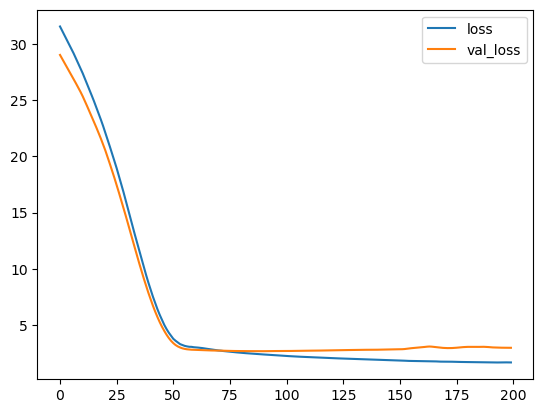

In [18]:
losses = pd.DataFrame(model.history.history)

losses.plot()

In [19]:
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
print("mean squared error is", mean_squared_error(y_test, predictions))
print("\n")
print("mean absolute error is", mean_absolute_error(y_test, predictions))

mean squared error is 2.9656946554494636


mean absolute error is 1.3631224338824934


##### For hardness values that is measured on a scale of 10, the mean error values generated by the model seems quite admissible. One could assume that with availability of more data, the model can even achieve lesser mean error values and ensure better accurate predictions

In [25]:
compare = np.concatenate((y_test.reshape(len(y_test), 1), predictions.reshape(len(predictions), 1)), axis = 1)

In [28]:
comparisons = pd.DataFrame(compare, columns = ["Original Mohs Hardness", "Predicted Mohs Hardness"])

comparisons

,Original Mohs Hardness,Predicted Mohs Hardness
0,5.75,5.431864
1,5.50,4.489227
2,5.50,5.219416
3,4.00,6.785686
4,4.50,2.324470
5,4.00,5.432207
6,6.50,6.935275
7,6.00,5.890421
8,6.50,5.371202
9,2.50,5.418195
